<a href="https://colab.research.google.com/github/Deep-Learning-in-Multimedia/jupyter-notebook-Niick95/blob/master/Niklas_Holtz_Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Dream

by *Niklas Holtz*

# 1. Introduction
This project is part of the course *Deep Learning in Multimedia* at the *Carl von Ossietzky University Oldenburg* Germany, summer term 2020. In this course we were assigned various topics that should provide us with in-depth content about deep learning. This elaboration is the result of my topic: Deep Dream. The code can be executed directly in Colab, but you should not train your own model within chapter 3.1, as this is very time-consuming. The book *Deep Learning with Python* by *Francois Chollet* was chosen as the basis for this project, since a similar project has already been implemented there. However, some improvements have been made here in order to achieve even better results.

## 1.1 What is Deep Dream?

DeepDream is software that is based on *artificial neural networks* and was first developed and published by Google employee Alexander Mordvintsev. *Convolutional Neural Networks (**CNN**)* are used, which are actually used to recognize and classify content. However, it is used here to insert structures in the image that look similar to those of the trained neural network. To do this, the network basically runs backwards, so that the image is processed further and further until a desired input is recognized. The reversal procedure is never perfectly clear, as it uses a one-to-many mapping process. The images that arise after enough iterations often remind of dream structures, which is why this algorithm got its name. 

Since the code published by Google is freely accessible to everyone, there are many imitators who apply the algorithm or even refine it and finally upload their pictures to social networks tagging them with [#deepdream](https://twitter.com/hashtag/deepdream). In the picture below you can see a painting that was expanded by a CNN with different structures. The CNN was trained to detect birds. As can be seen, structures from the network were added at many corners and edges.
![A "deep dream" picture with a network trained on birds.](https://b2h3x3f6.stackpathcdn.com/assets/landing/img/gallery/4.jpg)
This image was generated by https://deepdreamgenerator.com

## 1.2 Brief History of Convolutional Neural Networks

Works by David Hubel and Torsten Wiesel first showed the presence of neurons in the visual cortex of cats and monkeys in the 1950s and 1960s. In their paper in 1968, they already proposed applying the concept of neurons to mathematical pattern recognition tasks. The concept of the perceptron, which is a concept of a greatly simplified artificial neural network introduced by Frank Rosenblatt, contributed to the breakthrough of today's artificial intelligence.

All of these works led to the first approaches of the CNN, which was introduced by Kunihiko Fukushima in 1980. These already contained two important basic types of layers: a convolutional layer and a downsampling layer. These *neocognitron* approaches, as Fukushima called them, are still used today in modern CNNs. In the meantime, there have been many other approaches to improve and train this model. At the end of the 1980s, the so-called backpropagation training, a supervised learning process with which the artificial neural network can be trained specifically on input data, became established.

Trained networks have already been used, for example, to recognize handwritten postcode numbers. However, laborious manual learning processes had to be carried out for this. The breakthrough came in 1989 with the implementation of Yann LeCun's first full CNN. By calculating the so-called convolution coefficients directly from the images, the learning of the networks could be fully automated and thus easily used for image recognition problems. This approach forms the basis of today's computer vision.

However, the CNNs were always slowed down by slow hardware, which is why they only gained popularity in the 2000s. It was shown in 2004 by K. S. Oh and K. Jung that neural networks on GPUs can be greatly accelerated. So their implementation was 20 times faster than a corresponding implementation on a CPU. With this impetus, neural networks and their training methods for GPUs have been continuously improved and have become what we still know today.

## 1.3 Motivation and Goals

The potential of neural networks is considerable. But the deeper a network is, the more difficult it is to understand how the learning process works. Depth visualization is an important tool for debugging and optimizing models. Various methods are used, for example, to visualize the intermediate activations of the individual layers. The use of Deep Dream theoretically offers the possibility to visualize the activation of the neurons of different layers in order to further optimize the network. However, I do not think that this method can prevail over other visualization methods. Nevertheless, this area offers good motivation, since the algorithm works much more with this "hidden" content of a network. In order to better understand this latter content, it may also be worth training your own model and applying the Deep Dream algorithm to it.

On the other hand, the deep dream algorithm also has an artistic aspect, since mostly very individual and abstract images are created. The resulting images often remind us of the so-called pareidolia, in which patterns in things, such as clouds, are recognized by people. The core motivation of this work is therefore to use the complexity of a nested neural network to create aesthetic and abstract images that are often reminiscent of dreams or the like. Since people's perceptions are very individual, the theoretical aspects of pareidolia should then be used to create a benchmark for analyzing and evaluating the generated images.

The following goals can be derived from this motivation:
1. **Train a CNN**. First, a CNN is to be created and trained in order to better control and understand the results of the later deep dream. Input images from known data records should be used for this.
2. **Evaluate and Optimize the CNN**. The trained CNN should then be evaluated to minimize typical deep learning problems, such as overfitting.
3. **Implement the Deep Dream**. The Deep Dream algorithm should be implemented regardless of the model used. The implementation should be class-based, if possible, so that there is no great programming effort when generating pictures later.
4. **Generate aesthetic images**. As soon as the algorithm is implemented, a generator is to be developed with which both simple images and moving images (videos) can be processed with the Deep Dream algorithm. For this purpose, both the custom model and several external models provided by Keras should be used.
5. **Evaluation and conclusion**. Finally, the generated images are to be analyzed and evaluated with regard to various aspects of pareidolia. On this basis, a conclusion should be drawn up, which summarizes the collected results again.

# 2. Theoretical Aspects

Now you already have a basic idea on the subject of this paper. This chapter will give you all the theoretical basics that are necessary to understand the later algorithms and analysis methods. The structure of a CNN is first explained to you in Chapter *2.1*. Building on this, popular pre-trained models are dealt with in Chapter *2.2*, which I will also use later. Chapter *2.3* explains how the Deep Dream algorithm works and what its core idea is. In Chapter *2.4*, a short digression into the pareidolia will introduce you to a benchmark against which the images generated later will be evaluated.


## 2.1 Structure of CNNs

First of all, i'd like to begin with the basic of *convolutional neuroal networks*. I am assuming that basic knowledge about neural networks already exists, so that only the basics of using CNNs for image recognition are explained here. To understand how the Deep Dream algorithm works, it is important to understand the concept of CNNs. The knowledge trained and stored in this network will subsequently form the basis for the algorithm.

The functionality of a CNN, as can already be seen in its history, is modeled to a certain extent on biological processes: the neurons. However, in contrast to conventional neural networks, CNNs do not only have one layer with fully or partially connected neurons, but consist of different layers. This means that particularly large amounts of data, e.g. pixels of an image can be processed without having to create a single neuron for each input. A CNN therefore basically corresponds to a partly locally connected feedforward network that consists of the following layers:

1.   The **convolutional layer**,
2.   the **pooling layer** and
3.   the **fully connected layer**.

These are arranged so that a pooling layer follows a convolutional layer. This combination can exist several times in succession in many networks. Finally, the fully connected layer occurs at the end of the network.

The *convolutinal layer* is able to recognize and save individual features such as patterns or structures in the input data. Neurons are arranged in this layer, the activity of which is calculated via a discrete convolution. For this purpose, a (usually small) convolution matrix is moved over the input (e.g. over the values of a color channel of an image). As a result, an input for the neuron is calculated from the inner product of the matrix and the current image section. This input is finally transferred to an activation function, which is usually the so-called *rectified linear unit* (ReLU) function in CNNs. In the lower convolutional layers, the size of the matrices increases and thus the complexity of the features identified (e.g. eyes or mouths).

> ReLU: f(x) = max(0, x), *or sometimes* f(x) = ln(1+e^x)

Furthermore, the *pooling layer* compresses and reduces the resolution of the recognized features. For this purpose, max pooling can be used, for example, in which a filter matrix is moved over the neuronal activities. Only the neuron that shows the strongest activity for the input image is selected. All other neurons within the filter matrix are discarded, so that superfluous information is filtered out and the amount of data is reduced. This increases the speed of calculation while not affecting the performance of machine learning.

To conclude, the CNN is completed by the *fully connected layer*. It is directly linked to each output characteristic of the previous layer and thus enables the final classification. The number of neurons within this layer depends on the number of objects to be recognized. Basically, the fully connected layer corresponds to the construction of a multi-layer perceptron. The output of this layer is usually converted into a probability distribution by various functions, such as the *softmax function*.


## 2.2 Popular Models

Now that we know how CNNs are built and how they work, I would like to present some popular pre-trained models that I will use later in this elaboration. Due to the large number of such models, it is of course not possible for me to introduce all of them. Therefore, I limit myself to what I believe to be the most important models that Keras, the deep learning library that will be used in the later implementation, offers. The accuracies of the following models always refer to the so-called Top-1-Accuary. A detailed list of many image classificator using ImageNet can be found [here](https://paperswithcode.com/sota/image-classification-on-imagenet). As can be seen from the publication data of the models, intensive research is still being carried out on the development of a reliable model.

One of the most important and most frequently used models is probably **InceptionV3**. It is the third generation of Google’s Inception CNN, which was originally introduced during the ImageNet Recognition Challenge. This version ultimately emerged from the paper "[*Rethinking the Inception Architecture for Computer Vision*](https://arxiv.org/abs/1512.00567)" and was trained with over a million training data to differentiate between 1001 different classes (click [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for a full list of those classes). It achieves an accuracy of more than 78.1% in approximately 170 epochs. The model consists of a large number of different layers, as can be seen in the image below. The image comes directly from Google's report "[*Extended Guide to Inception v3*](https://cloud.google.com/tpu/docs/inception-v3-advanced?hl=de)" on their cloud.

![Schematic diagram of InceptionV3.](https://cloud.google.com/tpu/docs/images/inceptionv3onc--oview.png?hl=de)

Another development of this model is the Inception series is **InceptionResNetV2**. It originated from the paper "[*Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning*](https://arxiv.org/abs/1602.07261)" and uses the same training data as Inceptionv3. The idea was to combine the Inceptionv3 model with [Microsoft's ResNet model](https://arxiv.org/abs/1512.03385). However, this model achieves an accuracy of 80.4%. As you can see in the picture below, it has a much more complex structure. This schematic representation is taken directly from the [Google Blog](https://ai.googleblog.com/2016/08/improving-inception-and-image.html).

![Schematic diagram of InceptionResNetV2](https://1.bp.blogspot.com/-O7AznVGY9js/V8cV_wKKsMI/AAAAAAAABKQ/maO7n2w3dT4Pkcmk7wgGqiSX5FUW2sfZgCLcB/s640/image00.png)

**Vgg16** is a CNN model developed by K. Simonyan and A. Zisserman from the University of Oxford. Like the previous models, this model was developed extensively in a [paper](https://arxiv.org/abs/1409.1556). It was also trained on the data from ImageNet and the over 14 million training data lead to 1000 classes that can be differentiated. It is interesting to know that the model was trained with NVIDIA Titan Black GPUs for weeks. Finally, it achieves a 74.4% accuracy. The structure of this model does not provide any major surprises, which is why a schematic diagram is not worthwhile here. However, if you would like information about this, you can find more [here](https://neurohive.io/en/popular-networks/vgg16/).

Another network is **MobileNetV2**. It was originally intended for use on mobile devices, so it was implemented in a safe, private and energy-saving way. It achieves 74.7% accuracy based on ImageNet. Good documentation can be found in the accompanying [paper](https://paperswithcode.com/paper/mobilenetv2-inverted-residuals-and-linear).

Last but not least, let's consider the so-called **DenseNet-161** model. It is intended to solve the problems that have arisen with particularly large models such as ResNet or Inceptionv4. The problem with models that are too large is that information can be lost due to the sheer size and number of individual layers, even before they can reach the most relevant layers. The idea, therefore, is to add dense layers to condense information. This model achieves an accuracy of 78.44% based on ImageNet. A paper that further decodes this fact can be found here. A paper that continues this approach can be found [here](https://paperswithcode.com/paper/averaging-weights-leads-to-wider-optima-and).

## 2.3 How the Deep Dream algorithm works

So far we have seen some theoretical aspects, all of which have more or less to do with the Deep Dream algorithm. But how can an image be automatically expanded with abstract structures based on this knowledge? In the end, the basic idea may not be as complicated as you might think after all this theory.

As mentioned in the introduction, the algorithm uses a CNN in reverse order. To do this, it requests the CNN to restore the input image in the form of images known. However, there is a lot of calculation behind this process, such as that of the gradient of the input image with respect to the activations of a specific layer. In addition, there are now some optimization techniques to achieve even better results. I would now like to go into all of this step by step.

First of all, you need a model for the algorithm because, as already indicated, it only works with CNNs. In addition to the models presented in the previous chapter, many other models can be used, but later the preprocessing of the images differs slightly, which is why the implementation can sometimes change. The result of the algorithm is strongly dependent on the model, since depending on what features are stored in a CNN, the image is changed accordingly with these. The first publication of this algorithm was originally implemented with the *InceptionV3* model, so I will put a special focus on this in the later chapters.

Once we have decided on a model, we want to calculate the **loss**. The loss basically says how good the model is. It is calculated during training and validation and, contrary to accuracy, is not a percentage, but the number of errors made by the different layers. These errors are basically the results of a layer's activation functions. For this reason, you usually try to minimize the loss as much as possible. **And that's exactly where the idea of the algorithm starts!** Instead of minimizing the loss, we maximize it. Strictly speaking, it is not the loss but the so-called weighted sum of the L2 norm of the activations that should be maximized from a selection of different layers. The L2 is a vector norm defined for a complex vector (click [here](https://mathworld.wolfram.com/L2-Norm.html) for more information). 

> The L2 normal of a vector x = (x1, x2, x3) is given by |x| = sqrt(x1^2 + x2^2 + x3^2)

And this is how the L2 norm is calculated in the implementation (see chapter 3.3):

```
  loss = K.variable(0.)
  for layer_name in self.features:
    coeff = self.features[layer_name]
    loss = loss + coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) 
```

Once you have calculated the loss for the choosen layers, all that is left it to calculate the gradients with respect to the image. These gradients must then be added to the original image. **Gradient ascent** is used in numerics to solve general optimization problems. Basically, the gradient is added to the original image with a step size until a predefined limit is reached. In the algorithm, this limit is either a maximum loss value or a maximum number of iterations. This is how the method for calculating this optimization process looks in the code (see chapter 3.3):
```
  def gradient_ascent(self, img):and a maximum loss. '''
    for i in range(self.iterations):
        loss_value , grad_values = self.eval_loss_grads(img)
        if self.max_loss is not None and loss_value > self.max_loss:
            break
        img += self.step_size * grad_values
    return img

```

So far we have covered the basic elements of the algorithm. It is time to take a deeper look into the exact process, because with previous knowledge it is not yet possible to achieve results that are too good. In order to optimize the algorithm, the input image should be processed in different sizes. Each result should influence the next larger one without losing any details due to the enlargement / reduction. The entire algorithm can be summarized in the following points:

1. Load the original image.
2. Define a number of ascending scales, the so-called **octaves**.
3. Resize the image to the smallest.
4. Now do the following for all sizes in ascending order: -> Run gradient ascent -> Upscale the image to the next octave -> Reinject detail that was lost when upscaling
5. When the last octave is reached, we stop and reinject the lost details one last time.

But why do we create different sizes at all? There are several reasons for this:

1. The result would be a bit noisy.
2. The result would have a low resolution.
3. The patterns appear like they're all happening at the same granularity.

By running the algorithm for different sizes, we can prevent these problems. Each scale should be 40% larger than the previous one. After applying the deep dream algorithm for the first octave, the result must be scaled up. Then we create a version of the original image at the same scale and add it to the scaled-up result of the first octave to get back lost details. Then the algorithm is applied again to this merged image of octave 2, it is scaled up and so on up to the last octave/scale.

From this description, there are now some variables that I call **hyper parameters**. In the later generation of images with this algorithm, you will see how the individual parameters can influence the end result. These hyper parameters will reappear later in the implementation, but I would like to briefly describe them already here:

* *step_size*: The enlargement of the gradient method for each iteration.
* *num_ocatve*: The number of octaves the algorithm should calculate.
* *octave_scale*: This is the ratio between the scales (e.g. 1.4 = 40%)
* *iterations*: This is the number of ascent steps per each octave.
* *max_loss*: This is the maximum loss value at which the gradient process is terminated. This value exists so that no ugly artifacts arise.
* *features*: This is an array of the treated layers of the model with an associated weighting.



 




## 2.4 Pareidolia: A benchmark for generated dreams?

Before I get to the actual implementation, I would like to take a brief look at a phenomenon that also occurs in the results of the deep dream. **Pareidolia** is the tendency to misinterpret a stimulus as an object, pattern, or things known to the viewer. A classic example of this is recognizing shapes in clouds or recognizing faces in lifeless objects or abstract patterns. Recognizing hidden messages in music is also part of Pareidloia. Particular attention was paid to the picture of a Martian landscape published by NASA in 1976, which strongly resembled a human face. However, the "Face on Mars", as it was repeatedly called by the media, appears as a normal rock formation in later recordings, which was eroded by natural processes. 


Not much is known about the exact cause of these misinterpretations in humans, but they differ from classic hallucinations in that they can be controlled at will. So if you make an effort to recognize a face in a cloud, you can often do it. Another peculiarity of natural pareidolia is that it is usually perceived by several people at the same time. This fact has led to many cases where people have recognized religious figures in common things, so entire pilgrimages have been organized to show this phenomenon to religious followers. In the pictures below you can see the "*Face on Mars*" (left, taken from [Wikipedia](https://en.wikipedia.org/wiki/Pareidolia)) and a cheese toast, on which "*Virgin Mary*" is to be seen (right, taken from the [BBC](http://news.bbc.co.uk/2/hi/americas/4034787.stm)). The latter was sold on eBay for $ 28,000 (no kidding)!

!["Face on Mars"](https://upload.wikimedia.org/wikipedia/commons/7/77/Martian_face_viking_cropped.jpg)
![alternativer Text](http://newsimg.bbc.co.uk/media/images/40534000/jpg/_40534689_toastie-afp203.jpg)

But why am I dealing with this science? Well, the ability of the computer to use the deep dream algorithm to recognize things in an inconspicuous image that are already known to the computer through an artificial neural network is already often seen as a part of pareidolia. However, I mainly deal with this topic in order to be able to better assess the quality of the later results. So I want to evaluate how well the algorithm can recognize abstract structures, but also features we can recognize, such as eyes and faces - just as we humans would do. Of course, this is still a very subjective approach to evaluation, but this science offers a first benchmark for evaluation. Based on other areas of pareidolia, I will deal with the following questions in order to have a reasonably objective evaluation criterion for the results of the algorithm:

1. Have structures been added to the picture?
2. How do the structures differ from the original picture?
3. What kind of structures were recognized (abstract or concrete features)?
4. How clearly have the structures been highlighted in the picture?


# Implementation

Now that we have a good theoretical foundation, we can finally start implementing it. I have structured these chapters in such a way that each code block is first explained by a short text. The code itself also contains some comments that should help you understand it better. However, some procedures have already been explained in the theoretical basics (see Chapter 2).

I'm going to divide this chapter into four parts. First, in *chapter 3.1*, I would like to give comprehensive instructions on how to create and train your own model. This model will also later be passed to the Deep Dream algorithm to check whether you can control the output of the algorithm using your own model. Building on this model, it will be visualized and evaluated in *chapter 3.2*. This is to ensure that the model has no overfitting, for example. The deep dream algorithm is then finally implemented in *chapter 3.3*. In order to be able to use it in the later chapters in the most simplest way, a generator is implemented in *chapter 3.4*, with which dreams can be generated in different ways.

## 3.1 Creating a Model from Scratch

In order to create the simplest possible model, data is downloaded from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). The dataset contains 2000 JPG pictures of dogs and cats. It consits of a `train` and a `validation` subdirectories for the training and validation datasets. Both are extracted to the the local directory `/tmp/cats_and_dogs_filtered`.

In the following code you can see how the data is downloaded, extracted and stored in the subdirectory. The variables that are declared here are important for the rest of this chapter. So this code should always be run before running the other blocks in this chapter.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

# Download the zip file, unzip it and save it locally in /tmp
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

tmp_tip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(tmp_tip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# This is the base directory
base_dir = '/tmp/cats_and_dogs_filtered'
# The subdirectory for training
train_dir = os.path.join(base_dir, 'train')
# The subdirectory for validation
validation_dir = os.path.join(base_dir, 'validation')

# Now the training and validation pictures of dogs and cats are saved individually
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_file_names = os.listdir(train_cats_dir)
train_dog_file_names = os.listdir(train_dogs_dir)
  
# In order to have an overview of how much data has been loaded in total, the number of elements within each folder is outputted here.
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

The following method was only implemented to get a first impression of what the data looks like. Of course, this is no longer necessary for creating the model, but it is a good way to get a feeling for the network. To get more or less output, you can change the parameters of the method (rows and cols) as you like.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_dataset(rows=4, cols=4):
  fig = plt.gcf()
  # size of the images
  fig.set_size_inches(rows * 4, cols * 4)
  cntr = 0
  
  total_count = rows * cols
  # cat,  dog and all pictures
  cat_pics = [os.path.join(train_cats_dir, file_name) for file_name in train_cat_file_names]
  dog_pics= [os.path.join(train_dogs_dir, file_name) for file_name in train_dog_file_names]
  all_pics = cat_pics + dog_pics

  while cntr < (rows * cols):
    # just picking a random one
    pic = random.choice(all_pics)
    pic_path = os.path.abspath(pic)
    plots = plt.subplot(rows, cols, cntr + 1)
    # hide the axis
    plots.axis('off')
    pic_data = mpimg.imread(pic_path)
    plt.imshow(pic_data)
    cntr += 1
  plt.show()

# change the parameters if you like
plot_dataset(rows=3, cols=3)

Now the architecture of the new CNN will be explained to you. The classic CNN architecture usually consists of several convolution layers, pooling layers and one or more fully connected layers. After researching and comparing with other neural networks, I decided to use **four** convolution layers. The filter size of them is continuously increasing from 16 up to 128. In addition, the use the ReLU activation function (rectified linear unit). 

See the keras documentation for additional information about activation functions: https://keras.io/api/layers/activations/

The pooling layers will use simple MaxPooling2D. Take a look a at the following link for more information. https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In order to process the images, it is also necessary to determine a final size of the input data. I chose 150x150 here.

Finally, two fully connected are added, which will later classify the two animal species. The first layer will use a ReLU activation function with 512 hidden units. The second layer, on the other hand, uses a sigmoid activation to generate a scalar between 0 and 1.

In theory, these layers are not absolutely necessary for the later deep dream algorithm, but the CNN must first be trained and validated.

> **Addition after first results:** As the first results of this network showed strong overfitting, a dropout layer was added. Simply put, dropout refers to ignoring units (neurons) during the training phase of certain set of neurons which is chosen at random.







In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Input feature map with a size of 150x150 and three different channels (R, G, B)
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Two Fully-connected layers:

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# First fully-connected layer with a ReLU activation function
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Second fully-connected layer with a sigmoid activation function
output = layers.Dense(1, activation='sigmoid')(x)

# Create model and print its structure to the console
model = Model(img_input, output)
model.summary()

Now that the model has been created, it's time to compile and configure it. As a loss function, I use binary_crossentropy because it works well for multi-label classification. The loss tells us how wrong the model's predictions are. There are many more loss functions in the keras documentation.

I use Adam as an optimizer because it adapts the learning rate automatically and has already proven itself in many other implementations. Alternatives would be RMSprop or Adagrad, for example, since these also adjust the learning rate.

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])


Now it is time for data preprocessing because the data must be preprocessed to train the model within the next step.

> **Addition after first results:** Because of strong overfitting, the concept of *data augmentation* was used here. Since there is relatively little training data, it is artificially augmented here. To do this, random transformations are applied to the data so that the model does never see the exact same picture twice during the training phase. The  ```ImageDataGenerator``` offers the possibility to apply different random transformations to the training set. You can see these in a self-explanatory manner in the following code section.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_file_names[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The actual work is done by the flow method, since it generates the randomly transformed images.
# For illustration purposes, some images are also output directly here.
max_pics = 10
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i >= max_pics:
    break


In order to train the neural network, two generators must be created that insert the images into the network as tensors with their labels. A generator for training and one for validation must be implemented. In addition, the pixel values of the images must be normalized to a [0, 1] range in order to make the network value as accessible as possible.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # The images will have a size of 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Finally, the network must be trained. It is now trained on the basis of 2000 images and validated on the basis of 1000 images. To get a good result, the network is trained for 15 epochs.

**Warning! The execution of this training in the browser will take a few minutes of processing time.**


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

To save the model, you can put it directly into your Google Drive. From there you can easily call it up later.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model_name = "cat_dog_model_1_no_overfitting.h5"
model.save("/content/drive/My Drive/" + model_name)

## 3.2 Visualization and Evaluation

The model is now trained and saved and therefore ready to be examined in more detail. First of all, I would like to show you how you can load the model from your drive again. Then I would like to briefly show how you can actually predict things with the data set's validation data. To get an impression of the created network, I would like to show you how to visualize the intermediate activations. Finally, the network should be evaluated using various graphs with regard to accuracy and loss.

So let's load the model from the drive.

In [ ]:
import tensorflow as tf
from tensorflow import keras
model_name = "cat_dog_model_1_no_overfitting.h5"
model = tf.keras.models.load_model("/content/drive/My Drive/" + model_name)
# Let's print the architecture of the model
model.summary()
print("Model loaded.")


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In order to make a prediction, you can simply load a random file from the training or validation data. The image must be loaded into a suitable numpy array and can then be determined using predict. As you saw when creating the model, the classifier prints a number between 0 and 1 at the end of the model. This number therefore corresponds to the prediction of the model.

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential

# Load the pictures and choose a random one
cat_pics = [os.path.join(train_cats_dir, file_name) for file_name in train_cat_file_names]
dog_pics= [os.path.join(train_dogs_dir, file_name) for file_name in train_dog_file_names]
pics = dog_pics + cat_pics
img_path = random.choice(pics)
img = load_img(img_path, target_size=(150, 150))

# Print the picture
pic_path = os.path.abspath(img_path)
pic_data = mpimg.imread(pic_path)
plt.imshow(pic_data)
plt.show()

# Transfer the image to a numpy array
np_img = img_to_array(img) # (150, 150, 3)
np_img = np_img.reshape((1,) + np_img.shape) # (1, 150, 150, 3)
np_img /= 255 # Rescale by 1/255

# Predict a random image
prediction  = model.predict(np_img)
print(100 * np.max(prediction))

In order to get a deeper insight into the hidden regions of the network, you can output the activation functions of the model with the following code.

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_file_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_file_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Now we want to determine the accuracy and the loss. You can simply plot the history of the model to get a nice graph.

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As can be seen, the model achieves an accuracy of almost 100% (in blue), while the validation accuracy stalls as 70%. This is a classic problem in machine learning and is known as **overfitting**. This shouldn't be a problem for now, however, because the network is adequately trained to use the deep dream algorithm.

## 3.3 Deep Dream

Now that I've shown you how to build and evaluate a model, let's move on to the exciting part: implementing the Deep Dream algorithm. The generated code is based on the book by Francois Chollet mentioned at the beginning, but contains many modifications and improvements that I made myself.

In order to be able to use the algorithm as easily as possible later, it was implemented as a simple large class. This has the advantage that the entire complex sequence of the algorithm can be executed later by calling a single method. In addition, later it would be simply too much confusing to discuss large blocks of code mixed with generated images.

Since the theoretical aspects of the algorithm have already been explained to you in the previous chapter, I will not go into the exact structure of the code any further. However, for a better understanding, I left some comments with which you should be able to understand the process.

In [2]:
import os
import numpy as np
import scipy
from IPython.display import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, save_img
from keras.applications import inception_v3
from keras.utils import plot_model
from keras.utils import get_file
import keras.backend as K
from google.colab import files

class DeepDream:

  step_size = 0.05  # Gradient ascent step size
  num_octave = 3  # Number of scales at which to run gradient ascent
  octave_scale = 1.4  # Size ratio between scales
  iterations = 20  # Number of ascent steps per scale
  max_loss = 10. # To avoid ugly artifacts with define a maximum loss value
  path = "/content/drive/My Drive/" # Standard path for gdrive images
  model = inception_v3.InceptionV3(weights='imagenet', include_top=False)
  output_size = (30, 30)

  # These are the names of the layers whose activation function we want to maximize
  features = {
    "mixed4": 1.0,
    "mixed5": 1.5,
    "mixed6": 2.0,
    "mixed7": 2.5
  }

  def __init__(self, print_steps=True, path="/content/drive/My Drive/"):
    self.print_steps = print_steps
    self.path = path
    self.opt_func = inception_v3.preprocess_input

  def set_output_size(self, size):
    self.output_size = size

  def set_opt_func(self, func):
    self.opt_func = func

  def get_path(self):
    return self.path

  def set_model(self, model):
    ''' Sets the model. '''
    self.model = model;

  def set_param(self, step_size=0.01, num_octave=3, octave_scale=1.4, iterations=20, max_loss=10):
    ''' Sets the param. '''
    self.step_size = step_size
    self.num_octave = num_octave
    self.octave_scale = octave_scale
    self.iterations = iterations
    self.max_loss = max_loss

  def set_features(self, features):
    ''' Sets the names of the layers (features). '''
    self.features = features

  def get_original(self):
    if self.original is None:
      raise ValueError('No original image was found.')
    img = np.copy(self.original)
    img = img.reshape((img.shape[1], img.shape[2], 3))
    img /= 2
    img += 0.5
    img *= 255
    img = np.clip(img, 0, 255).astype('uint8')
    return img

  def get_result(self):
    if self.result is None:
      raise ValueError('No result image was found.')
    return self.result

  def print_figure(self, title, size, img):
    figure = plt.figure(figsize = size)
    img_plt = figure.add_subplot(2, 2, 1)
    img_plt.set_title(title)
    img_plt.imshow(img)

  def show_original(self, title = "Original"):
    img = self.get_original()
    self.print_figure(title, self.output_size, img)

  def show_result(self, title = "Result"):
    img = self.get_result()
    self.print_figure(title, self.output_size, img)

  def download_result(self, name, dpi=100):
    img = self.get_result()
    height, width, depth = img.shape
    figsize = width / float(dpi), height / float(dpi)
    figure = plt.figure(figsize=figsize)
    img_plt = figure.add_subplot()
    img_plt.axis('off')
    img_plt.imshow(img)
    figure.savefig(name, dpi=dpi)
    files.download(name) 
  
  def preprocess_image(self, img_data):
    ''' Load, resize and format the image so that Inception V3 can process it. '''

    if isinstance(img_data, str):
      # IMG is a path to an image file.
      img = load_img(self.path + img_data)
    else:
      # If the IMG is not a path, we assume that it is an image file.
      img = img_data

    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    if self.opt_func is not None:
      img = self.opt_func(img)
    return img

  def deprocess_image(self, img):
    ''' Convert a tensor into a valid image. '''
    if K.image_data_format() == 'channels_first':
        img = img.reshape((3, img.shape[2], img.shape[3]))
        img = img.transpose((1, 2, 0))
    else:
        img = img.reshape((img.shape[1], img.shape[2], 3))
    img /= 2.
    img += 0.5
    img *= 255.
    img = np.clip(img, 0, 255).astype('uint8')
    return img

  def resize_img(self, img, size):
    ''' A simple function to resize an image. '''
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)
  
  def eval_loss_grads(self, x):
    ''' A simple function that returns the loss and gradient values. '''
    loss_value, grad_values = self.fetch_loss_and_grads([x])
    return loss_value, grad_values

  def gradient_ascent(self, img):
    ''' This function runes gradient ascent for specific number of iterations and a maximum loss. '''
    for i in range(self.iterations):
        loss_value , grad_values = self.eval_loss_grads(img)
        if self.print_steps:
          print(f'iter {i}, loss_value {loss_value}')
        if self.max_loss is not None and loss_value > self.max_loss:
            break
        img += self.step_size * grad_values
    return img

  def init(self):
    ''' '''
    # Disable all training-specific operations because I don't want to train the model.
    K.set_learning_phase(0)
    # load the model
    self.dream = self.model.input

    # create a dictionary for te layers
    layer_dict = dict([(layer.name, layer) for layer in self.model.layers])

    # Now we want to define a tensor that contains the loss. 
    # The loss is the weighted sum of the L2 norm of the activations of my defined layers (features).
    loss = K.variable(0.)
    for layer_name in self.features:
        # Raise an error if the model has not been found.
        if layer_name not in layer_dict:
            raise ValueError('Layer ' + layer_name + ' not found in model.')

        # This is the layer's output.
        coeff = self.features[layer_name]
        x = layer_dict[layer_name].output

        # No add the L2 Norm of the features of a layer to the loss.
        # To exclude border artifacts, only nonborder pixel are included to the loss.
        scaling = K.prod(K.cast(K.shape(x), 'float32'))
        if K.image_data_format() == 'channels_first':
            loss = loss + coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
        else:
            loss = loss + coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

    # Compute the gradients of the dream with respect to the loss.
    grads = K.gradients(loss, self.dream)[0]
    # Normalize the gradients.
    grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

    # To improve performance, we create a Keras function 
    # that can output the loss and gradient values of the input image.
    outputs = [loss, grads]
    self.fetch_loss_and_grads = K.function([self.dream], outputs)

  def run(self, img_data):
    '''
    img_data = name or image file
    '''
    if img_data is None:
      raise ValueError('Image not found.')

    img = self.preprocess_image(img_data)
    print("Image has been loaded.")
    self.init()

    # Load the image
    self.original = img

    # First, we want to use the number of octaves to prepare different sizes of the input image, 
    # which are then treated in ascending order.
    original_shape = img.shape[1:-1]
    successive_shapes = [original_shape]
    for i in range(1, self.num_octave):
        shape = tuple([int(dim / (self.octave_scale**i)) for dim in original_shape])
        successive_shapes.append(shape)
    successive_shapes.reverse()
    original_img = np.copy(img)
    # Resize the Numpy array of  the image to the smallest scale.
    shrunk_original_img = self.resize_img(original_img, successive_shapes[0])

    if self.print_steps: 
      print(shrunk_original_img.shape, original_img.shape)

    # Now, for every scale, starting with the smallest: Run gradient ascent, upscale the image in reinject the detail.
    for shape in successive_shapes:
      img, shrunk_original_img = self.make_step(shape, img, shrunk_original_img, original_img)

    # This is the result  
    result_img = self.deprocess_image(img)
    self.result = result_img

  def make_step(self, shape, img, shrunk_original_img, original_img):
    if self.print_steps:
      print('Processing image shape', shape)
    # Scale up the dream image
    img = self.resize_img(img, shape)
    # Run gradient ascent
    img = self.gradient_ascent(img)
    # Resize the original image and calculate the difference between them to get the detail that was lost when scaling up.
    upscaled_shrunk_original_img = self.resize_img(shrunk_original_img, shape)
    same_size_original = self.resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    # Add the detail to the image
    img += lost_detail
    shrunk_original_img = self.resize_img(original_img, shape)
    return img, shrunk_original_img

Using TensorFlow backend.


87916544/87910968 [==============================] - 3s 0us/step


## 3.4 Dream Generator

In order to apply the algorithm, it is theoretically enough to simply create an object of the Deep Dream class and execute the run method. However, in later sections I would like to use different methods for generating images, for example to edit an image more than once with the algorithm or to be able to edit videos. For this reason, you can see in the following code the DeepGenerator, which has various methods available for precisely these use cases.

Similar to the previous chapter, I have bundled and documented these methods in a single large class. You can see exactly how these methods are used and what results they deliver in the following chapter.

In [3]:
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import ImageSequenceClip

class DreamGenerator:

  def __init__(self, dream: DeepDream):
    self.dream = dream

  def get_dream(self) -> DeepDream:
    if self.dream is not None:
      return self.dream

  def set_dream(self, dream: DeepDream):
    if dream is None:
      raise ValueError('Dream is not defined.')

    self.dream = dream

  def get_file_extension(self, filename):
    _, ext = os.path.splitext(filename)
    return ext

  def gen_simple(self, img_name, show_result=True, show_original=True, download_result=True, download_name="deep_dream_simple"):
    if self.dream is None or img_name is None:
        raise ValueError('Dream or image name not defined.')
    
    print('> Generating simple ...')
    result_extension = self.get_file_extension(img_name)
    self.dream.run(img_name)
    frame = self.dream.get_result()

    if show_original:
      self.dream.show_original()
    
    if show_result:
      self.dream.show_result(title=download_name)

    if download_result: 
      self.dream.download_result(download_name+result_extension)

    return frame

  def gen_series(self, img_name, iterations=10, show_result=True, show_original=True, download_result=True, download_name="deep_dream_series", show_steps=True, zoom_factor = 0.05):
    if self.dream is None or img_name is None:
        raise ValueError('Dream or image name not defined.')

    print('> Generating series ...')
    result_extension = self.get_file_extension(img_name)
    # That's the original image that we don't want to download
    frame = load_img(self.dream.get_path() + img_name)
    frames = []
    # But we want to append it to the array
    frames.append(img_to_array(frame))
    
    for i in range(iterations):
      if show_steps:
        print('> Iteration '+str(i)+' ... ')

      self.dream.run(frame)
      
      if show_original and i==0: 
        self.dream.show_original()

      if show_result: 
        self.dream.show_result()
      if download_result: 
        self.dream.download_result(download_name+"_"+str(i)+result_extension)
      
      # Select the next frame and transform it
      frame = self.dream.get_result()
      frames.append(img_to_array(frame))
      pic = plt.imshow(frame)
      h, w = frame.shape[:2]
      s = zoom_factor
      frame = nd.affine_transform(frame, [1-s,1-s,1], [h*s/2,w*s/2,0], order=1)
    
    # Convert the array to a numpy array
    arr = np.array(frames)
    return arr

  def create_gif(self, array, fps=4, scale=1.0, download_name="deep_dream_series", download_result=True, show_result=False) -> ImageSequenceClip:
    print('> Generating gif ...')
    filename = download_name + '.gif'
    if array.ndim == 3: #If number of dimensions are 3, copy into the color dimension if images are black and white
        array = array[..., np.newaxis] * np.ones(3)
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    if download_result:
      files.download(filename) 

    return clip


  

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2654208/45929032 bytes (5.8%)6201344/45929032 bytes (13.5%)9904128/45929032 bytes (21.6%)13680640/45929032 bytes (29.8%)17367040/45929032 bytes (37.8%)21168128/45929032 bytes (46.1%)24756224/45929032 bytes (53.9%)28131328/45929032 bytes (61.2%)31014912/45929032 bytes (67.5%)34742272/45929032 bytes (75.6%)38510592/45929032 bytes (83.8%)41967616/45929032 bytes (91.4%)

# 4. Generating Dreams

Now it's finally time to create some dreams!

Run Chapter 3.3 and 3.4 before!

... TODO

## 4.1 Using different Images

In this chapter, I would like to make a small selection of images that can be used in the following chapters. As we saw in Chapter 2.4, a classic phenomenon of incorrect object recognition is cloud interpretation. For this reason, the first picture should definitely contain **clouds**.

As I read in other articles, you can often achieve good results with particularly varied pictures, on which a lot of colors, edges and objects can be seen. Therefore I want to test both a picture of a **galaxy** and a picture of a **big city**. Both contain an unbelievable number of different pixels and I'm curious to see what kind of results you can achieve with them.

Finally, I would like to test three more types of images. On the one hand a picture with **animals**, since all networks have been trained to recognize them. On the other hand, I would like to test a normal scene with **people**, simply because it is probably the most common application for such an algorithm in our everyday life. And last but not least, I would like to test a **landscape** picture, because such are always the focus of the pareidolia.

You can see the source of the image directly from the code. Although the algorithm offers the option of loading images directly from Google Drive, I want to make it as easy as possible for those who are following it to run the code. That's why I use Keras' built-in `get_file` function, which loads an image into the workspace and returns the path. Each of the pictures was taken from the [Unsplash](https://unsplash.com/). They are therefore free to use and have a free license. Of course, the processing of large images takes longer than that of small ones. Fortunately, the size of *Unsplash*'s images can be set directly in the URL. For this reason, after the initialization of the algorithm and the generator, there are also two options with which the `width` and the `quality` of the images can be set.

Since the original algorithm is based on the InceptionV3 model, I will only use this here for the time being. In the next chapter I will take a look at the models presented in the previous chapters.

---
First of all, the deep dream algorithm and the generator must be initialized. Then the images must be downloaded and variables assigned:

In [6]:
# Create the deep dream
dream = DeepDream(False, path="")   # Hide steps and remove the path in order to load files directly using keras' get_file function
dream.set_output_size((15, 15))     # Let's have a bigger result size.
# Create the generator
generator = DreamGenerator(dream)

#Settings
width = 1350
quality = 80

# Images
clouds = get_file("img_clouds1.jpg", "https://images.unsplash.com/photo-1498496294664-d9372eb521f3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/ap3LXI0fPJY
galaxy = get_file("img_galaxy1.jpeg", "https://images.unsplash.com/photo-1538370965046-79c0d6907d47?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") #https://unsplash.com/photos/fUnfEz3VLv4
big_city = get_file("img_city1.jpg", "https://images.unsplash.com/photo-1582760548598-0bccdf815aa2?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/VIhBOwitqu8
animals = get_file("img_animals1.png", "https://images.unsplash.com/photo-1554189280-4ebfe0b02294?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") #https://unsplash.com/photos/OKe4Q8azVNU
people = get_file("img_people1.jpg", "https://images.unsplash.com/photo-1501386761578-eac5c94b800a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/nPz8akkUmDI
landscape = get_file("img_landscape1.jpg", "https://images.unsplash.com/photo-1501785888041-af3ef285b470?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/T7K4aEPoGGk

Now let's activate the generator and apply one iteration of the algorithm per picture. We do not change any settings, but adopt the standard settings of the class. Attention, the size of the pictures can be overwhelming! If you also want to download the images, you can set `download_result` to `True` and the result will be offered as a download.

> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.


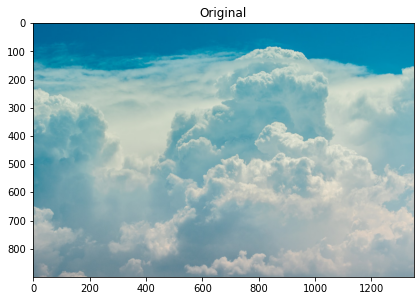

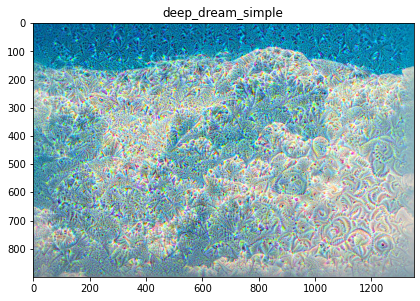

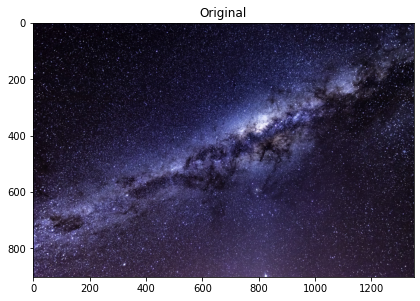

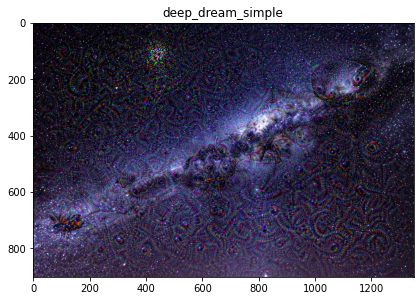

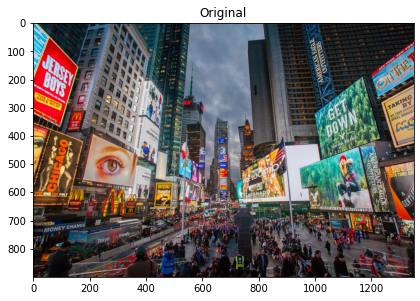

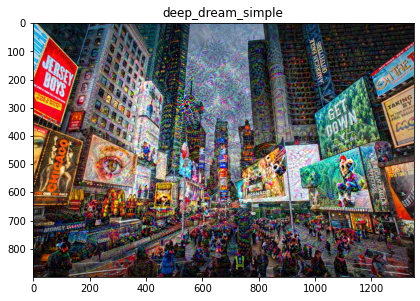

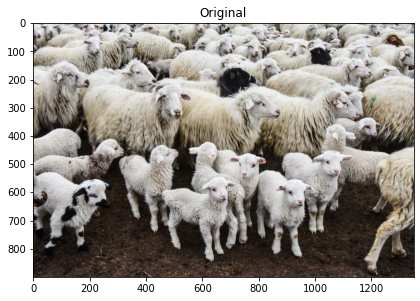

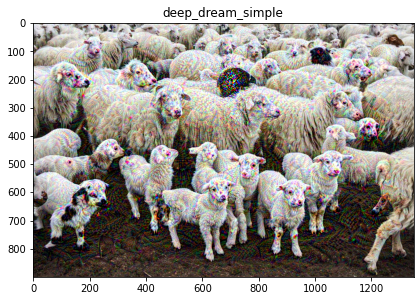

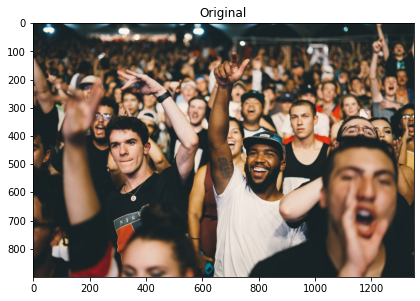

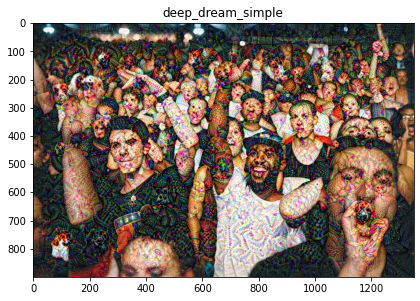

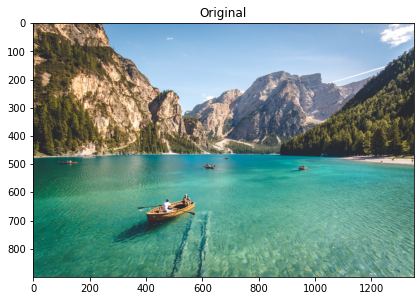

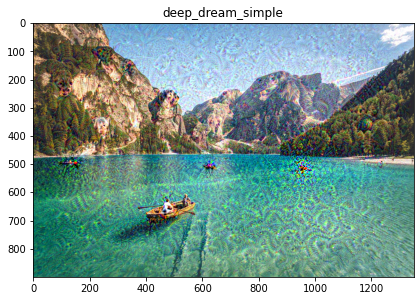

In [7]:
# Clouds
_ = generator.gen_simple(img_name=clouds, download_result=False)
# Galaxy
_ = generator.gen_simple(img_name=galaxy, download_result=False)
# Big City
_ = generator.gen_simple(img_name=big_city, download_result=False)
# Animals
_ = generator.gen_simple(img_name=animals, download_result=False)
# People
_ = generator.gen_simple(img_name=people, download_result=False)
# Landscape
_ = generator.gen_simple(img_name=landscape, download_result=False)

Now that we have generated some images, I would like to go back to the questions I raised in chapter 2.4. As can be seen, structures have been added to all of the images and they are all clearly different from their original. With some pictures, e.g. `animals`, the change is not as strong as in the `people` picture, but it is always clearly visible.

Now let's just work through the questions from chapter 2.4 for each picture individually. As a reminder, here are the questions again:

1. Have structures been added to the picture?
> Yes, structures have been successfully added to all images.
2. How do the structures differ from the original picture?
> Some are more different than others. The Animals picture, for example, differs much less from the original than e.g. the `people` picture. Overall, however, they all differ.
3. What kind of structures were recognized (abstract or concrete features)?
> In the pictures `clouds` and `galaxy` mostly abstract structures were recognized. However, there are already first signs of something that could resemble eyes or heads. The `big_city` picture combines abstract structures and also heads, eyes and all parts of the body, since all kinds of things can already be seen here through various advertisements. Moreover, abstract structures were added to the animal skins and the floor in the `animals` picture. All sorts of structures have been added to the "People" picture. However, the majority of them are reminiscent of animal ones. Almost every face was changed in some way. Finally, abstract structures were also added to the `landscape` picture. Nonetheless, some animal indications are also visible in the mountains (left).
4. How clearly have the structures been highlighted in the picture?
> The structures were best highlighted in the `people` picture. Abstract structures were also highlighted very well in the `cloud` and `galaxy` picture.

All in all, the `people` picture has clearly emerged as one of the most promising. For this reason, I would like to process a few more pictures at the end, on which a crowd can be seen. It will then appear on these pictures that the algorithm is heavily dependent on lighting and color. `crowd1` is much brighter and has more colors than `crowd2` and therefore has a better result.



In [8]:
#Settings
width = 1350
quality = 80

# Images
crowd1 = get_file("img_crowd1.jpg", "https://images.unsplash.com/photo-1579649663557-2ba54c88b558?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/lGVqqwogRJY
crowd2 = get_file("img_crowd2.jpg", "https://images.unsplash.com/photo-1584397953205-20c78dda0b1f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/6iK5U7OVZY8
crowd3 = get_file("img_crowd3.jpg", "https://images.unsplash.com/photo-1539657523674-fbd149b04c13?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/8I423fRMwjM
crowd4 = get_file("img_crowd4.jpg", "https://images.unsplash.com/photo-1588172561695-a9eed1db3441?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/cCIVkw4K27A

368640/363683 [==============================] - 0s 0us/step


> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.
> Generating simple ...
Image has been loaded.


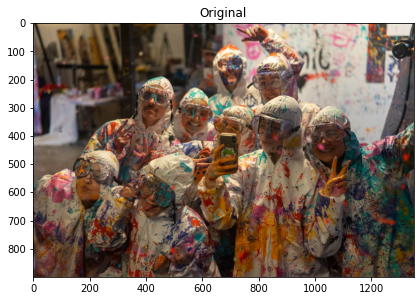

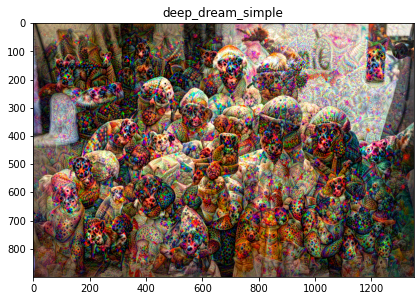

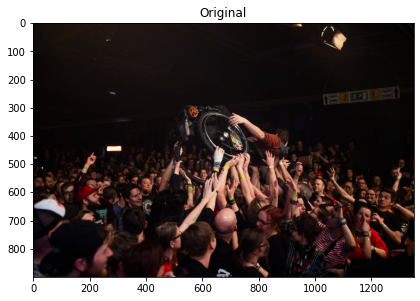

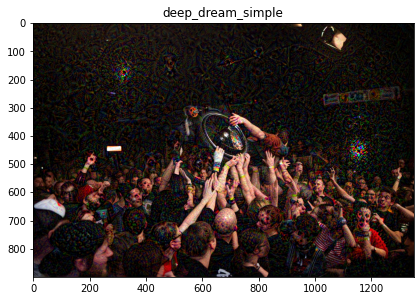

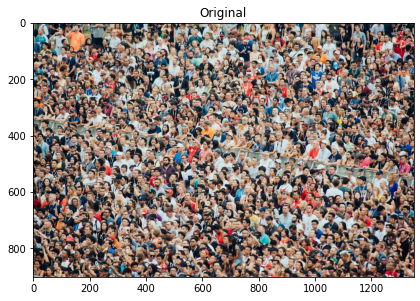

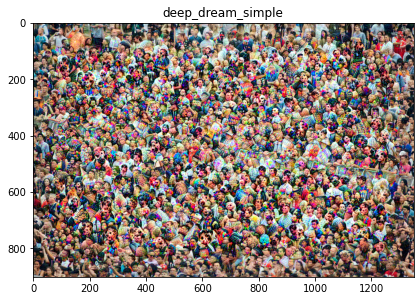

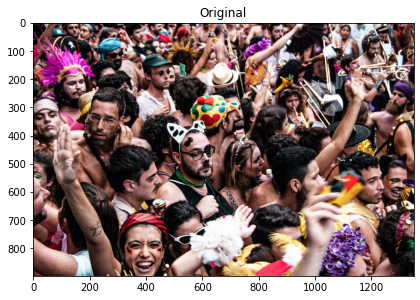

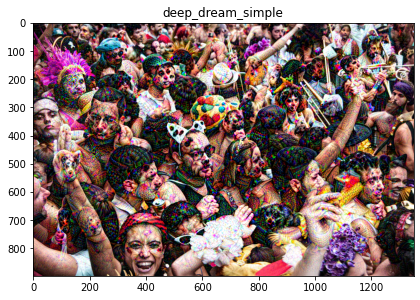

In [9]:
# Let's process those crowds
_ = generator.gen_simple(img_name=crowd1, download_result=False)
_ = generator.gen_simple(img_name=crowd2, download_result=False)
_ = generator.gen_simple(img_name=crowd3, download_result=False)
_ = generator.gen_simple(img_name=crowd4, download_result=False)

## 4.2 Using different models

Now we have looked at some different images and got a feel for which images the algorithm can achieve the best results. This chapter is about trying out the different models that I already introduced in *chapter 2.2*. As a basis, I will take three pictures for which I think I had the best results in the previous chapter: `People`, `Crowd1` and `Clouds`. The latter has, indeed, only generated a few "animal aspects", but a lot of abstract structures have emerged.

In order to apply the algorithm to the individual models, different features have to be loaded and different preporcess functions (set_opt_func) have to be provided. The models are considered block by block. 

In [ ]:
# If you have not yet run the code from the previous chapter, here are all the important pictures and other classes you need.

# Create the deep dream
dream = DeepDream(False, path="")   # Hide steps and remove the path in order to load files directly using keras' get_file function
dream.set_output_size((35, 35))     # Let's have a bigger result size.
# Create the generator
generator = DreamGenerator(dream)

#Settings
width = 1350
quality = 80

# Images
clouds = get_file("img_clouds1.jpg", "https://images.unsplash.com/photo-1498496294664-d9372eb521f3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/ap3LXI0fPJY
people = get_file("img_people1.jpg", "https://images.unsplash.com/photo-1501386761578-eac5c94b800a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/nPz8akkUmDI
crowd1 = get_file("img_crowd1.jpg", "https://images.unsplash.com/photo-1579649663557-2ba54c88b558?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/lGVqqwogRJY

294912/289149 [==============================] - 0s 0us/step


In [ ]:
# InceptionResNetV2
from keras.applications import inception_resnet_v2
model = inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False)
dream.set_model(model)
dream.set_opt_func(inception_resnet_v2.preprocess_input)
features = {
    'mixed_5b': 0,
    'mixed_6a': 1.0,
    'mixed_7a': 2.5
  }
dream.set_features(features)
_ = generator.gen_simple(img_name=clouds, download_result=False, download_name="sky_restnet_v2_clouds")
_ = generator.gen_simple(img_name=people, download_result=False, download_name="sky_restnet_v2_people")
_ = generator.gen_simple(img_name=crowd1, download_result=False, download_name="sky_restnet_v2_crowd1")

As you can see, **InceptionResNetV2** does very well. This is probably also due to the fact that this model is based on *InceptionV3* and can therefore be seen as a further development. The model probably had some difficulties with the `cloud` picture, as occasional noise can be seen. The `people` picture and especially `crowd1` picture have been changed a lot. The latter shows even clearer structures than in InceptionV3.

In [ ]:
# VGG 16
from keras.applications import vgg16

model = vgg16.VGG16(weights='imagenet', include_top=False)
dream.set_model(model)
dream.set_opt_func(vgg16.preprocess_input)
features = {
    'block1_conv1': 0,
    'block2_conv1': 1.0,
    'block3_conv1': 1.5,
    'block4_conv1': 2.0,
    'block5_conv1': 2.5,
  }
dream.set_features(features)
_ = generator.gen_simple(img_name=clouds, download_result=False, download_name="vgg16_clouds")
_ = generator.gen_simple(img_name=people, download_result=False, download_name="vgg16_people")
_ = generator.gen_simple(img_name=crowd1, download_result=False, download_name="vgg16_crowd1")

**VGG16** doesn't look that good. It looks like there are problems with the color channel there. Nevertheless, it can be seen that hardly any structures have been added. For this reason, I will not go into this model any further, but it was worth a try.

In [ ]:
# MobileNetV2
from keras.applications import mobilenet_v2

model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False)
dream.set_model(model)
dream.set_opt_func(mobilenet_v2.preprocess_input)
features = {
    'Conv_1': 4.0
}
model.summary()
dream.set_features(features)
_ = generator.gen_simple(img_name=clouds, download_result=False, download_name="mobileNetv2_clouds")
_ = generator.gen_simple(img_name=people, download_result=False, download_name="mobileNetv2_people")
_ = generator.gen_simple(img_name=crowd1, download_result=False, download_name="mobileNetv2_crowd1")

**MobileNetV2** generates useful results, but although a layer was selected that is almost at the end of the model, hardly any non-abstract structures have been added. Nevertheless, it created interesting patterns for all images that are in no way inferior to the upper layers of InceptionV3.

In [ ]:
# DenseNet169
from keras.applications import densenet

model = densenet.DenseNet169(weights='imagenet', include_top=False)
dream.set_model(model)
dream.set_opt_func(densenet.preprocess_input)
features = {
    'conv2_block1_1_conv': 1.0,
    'conv3_block1_1_conv': 1.5,
    'conv4_block1_1_conv': 2.0,
    'conv5_block1_1_conv': 2.5,
  }
dream.set_features(features)
_ = generator.gen_simple(img_name=clouds, download_result=False, download_name="denseNet169_clouds")
_ = generator.gen_simple(img_name=people, download_result=False, download_name="denseNet169_people")
_ = generator.gen_simple(img_name=crowd1, download_result=False, download_name="denseNet169_crowd1")

The **DenseNet169** model creates only abstract patterns on the picture, so that they almost resemble a painting. It is particularly striking here that the edges of the images remain almost untouched. However, this is due to the filters of the model and always occurs. It only stands out because the loss increases much faster than with the other models and the image is consequently changed much more.

In [ ]:
import tensorflow as tf

# Own model
model_name = "cat_dog_model_1_no_overfitting.h5"
model = tf.keras.models.load_model("/content/drive/My Drive/" + model_name)
# For our own model we have to create a new DeepDream object.
dream = DeepDream(False, path="")
generator.set_dream(dream)
dream.set_model(model)

def opt_func(np_img):
  return np_img / 255

dream.set_opt_func(opt_func)

features = {
    'conv2d': 0.,
    'conv2d_1': 0.3,
    'conv2d_2': 0.5,
    'conv2d_3': 1.0,
  }
dream.set_features(features)
_ = generator.gen_simple(img_name=clouds, download_result=False, download_name="own_model_clouds")
_ = generator.gen_simple(img_name=people, download_result=False, download_name="own_model_people")
_ = generator.gen_simple(img_name=crowd1, download_result=False, download_name="own_model_crowd1")

Unfortunately the results are bad. Despite all the effort to create your own model, there are no usable results. For the sake of completeness, I used a previous deep dream approach to create a couple of pictures below that achieved similarly poor results. It looks like the algorithm always focuses on one area. But why is that?

Two things stand out compared to the other models. On the one hand, the other models have much more training dates and periods of training time. On the other hand, they also have many more objects to classify. I can't exactly explain why this doesn't work with my own model, but I'm sure it has to do with these factors. Nevertheless, creating my own model has helped a lot to understand the previous models.

I don't want to continue working with this model, but instead focus on the two favorites of this chapter: **InceptionV3** and **IncetionResNetV2**.

In [ ]:
from IPython.display import display, HTML
display(Image('own_model_clouds.png'), Image('own_model_crowd1.png'), Image('own_model_people.png'))

## 4.3 Optimaization of Hyper Parameters

Optimize the max_loss and iterations!

In [ ]:
# Create the deep dream
dream = DeepDream(False, path="")   # Hide steps and remove the path in order to load files directly using keras' get_file function
dream.set_output_size((35, 35))     # Let's have a bigger result size.
# Create the generator
generator = DreamGenerator(dream)

#Settings
width = 1350
quality = 80

people = get_file("img_people1.jpg", "https://images.unsplash.com/photo-1501386761578-eac5c94b800a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/nPz8akkUmDI

# Loop through different values
values = [5, 10, 15, 20, 25, 30, 35, 40]
for i in values:
  print("> max_loss/iterations = "+str(i))
  dream.set_param(max_loss=i, iterations=i)
  frame = generator.gen_simple(img_name=people, download_result=False, show_original=False, download_name='dd_max_loss_iter_'+str(i))

## 4.4 Generating Series

So far we have been able to generate very useful results. But now I want to use a different approach: what if we used the result of the algorithm again as input for another iteration of the algorithm? I call this approach the **series generation**.

First of all: Of course, these calculations are much more complex than all previous ones. So I limit myself to a size of *1350x900* pixels and use the three favorite pictures from chapter *4.1* (`clouds`, `people`, `crowd1`) and the InceptionV3 model.

In the DreamGenerator class I have already written a function with which a series of images can be created. The `gen_series` method creates several iterations of the DeepDream and zooms in a little with each iteration in order to stimulate the algorithm differently each time. The images that this method returns can be passed to the `create_gif` method. This creates an animated GIF based on the results generated by the iterations. This gives me a first try with a moving picture, if you want to say that.



In [ ]:
# If you have not yet run the code from the previous chapter, here are all the important pictures and other classes you need.

# Create the deep dream
dream = DeepDream(False, path="")   # Hide steps and remove the path in order to load files directly using keras' get_file function
dream.set_output_size((35, 35))     # Let's have a bigger result size.
# We don't need to define a model here, because the DeepDream algorithm automatically loads the InceptionV3 model unless otherwise specified.
# Create the generator
generator = DreamGenerator(dream)

#Settings
width = 1350
quality = 80

# Images
clouds = get_file("img_clouds1.jpg", "https://images.unsplash.com/photo-1498496294664-d9372eb521f3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/ap3LXI0fPJY
people = get_file("img_people1.jpg", "https://images.unsplash.com/photo-1501386761578-eac5c94b800a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/nPz8akkUmDI
crowd1 = get_file("img_crowd1.jpg", "https://images.unsplash.com/photo-1579649663557-2ba54c88b558?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w="+str(width)+"&q="+str(quality)+"") # https://unsplash.com/photos/lGVqqwogRJY

Once everything is initialized, we can do it all in just 3 lines of code. Let's to that for all three pictures.

In [ ]:
frames = generator.gen_series(img_name=clouds, iterations=50, download_result=True, download_name="clouds_deep_dream_series") # Gnerate a series
gif = generator.create_gif(array=frames, download_result=True) # Create a gif
gif.ipython_display(loop=1, width=800, autoplay=1) # Display the gif, loop it and autoplay it.

In [ ]:
frames = generator.gen_series(img_name=people, iterations=50, download_result=False, download_name="people_deep_dream_series") # Gnerate a series
gif = generator.create_gif(array=frames, download_result=True) # Create a gif
gif.ipython_display(loop=1, width=800, autoplay=1) # Display the gif, loop it and autoplay it.

In [ ]:
frames = generator.gen_series(img_name=crowd1, iterations=50, download_result=False, download_name="crowd1_deep_dream_series") # Gnerate a series
gif = generator.create_gif(array=frames, download_result=True) # Create a gif
gif.ipython_display(loop=1, width=800, autoplay=1) # Display the gif, loop it and autoplay it.

## 4.5 Proccessing Videos

# 5. Conclusion